In [18]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.metrics import accuracy_score,confusion_matrix

In [19]:
df=pd.read_csv('~/Downloads/Predicting-Student-performance-master/xAPI-Edu-Data.csv')

# Data Analysis

In [20]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [21]:
df.shape

(480, 17)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [23]:
df.dropna() 

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [24]:
# Check if missing values exist or not
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

# EDA

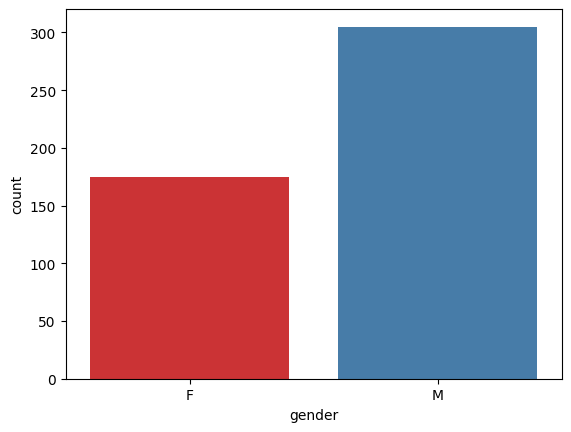

In [25]:
#plt.subplot(1,2,1)
sns.countplot(x="gender", order=['F','M'], data=df, palette="Set1")
plt.show()

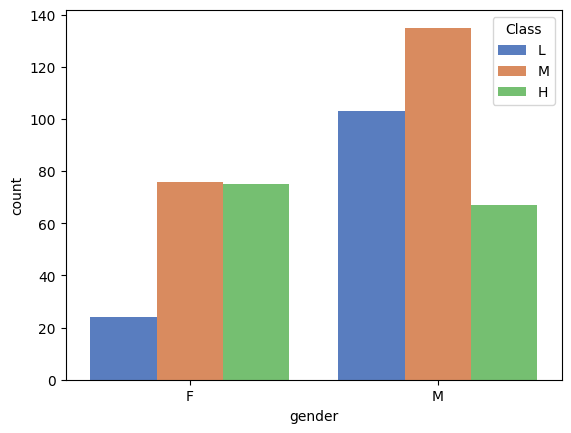

In [26]:
#plt.subplot(1,2,2)
sns.countplot(x="gender", order=['F','M'], hue="Class", hue_order=['L','M','H'], data=df, palette="muted")
plt.show()

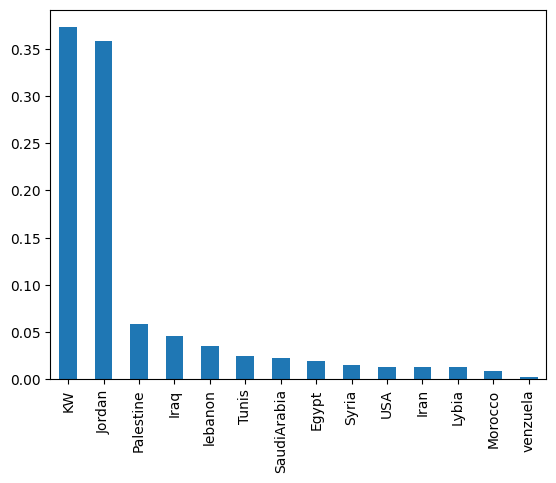

In [27]:
#plt.subplot(1,2,1)
df['NationalITy'].value_counts(normalize=True).plot(kind='bar')
plt.show()

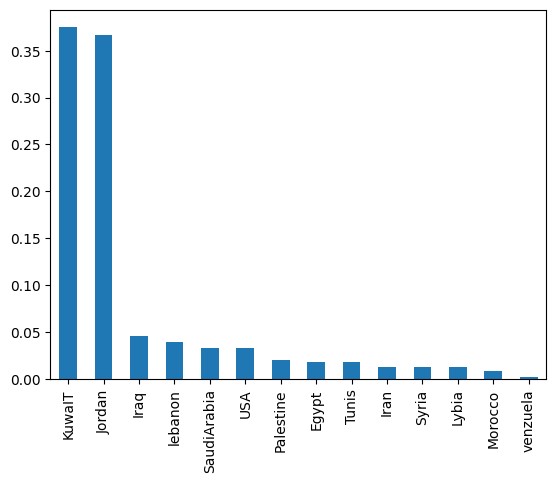

In [28]:
#plt.subplot(1,2,2)
df['PlaceofBirth'].value_counts(normalize=True).plot(kind='bar')
plt.show()

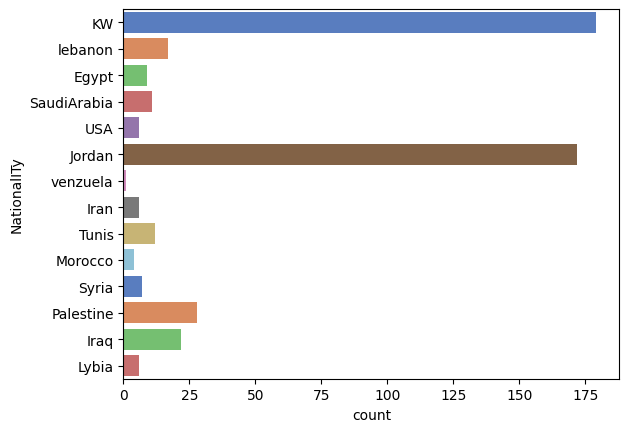

In [29]:
#plt.subplot(1,2,1)
sns.countplot(y="NationalITy", data=df, palette="muted")
plt.show()

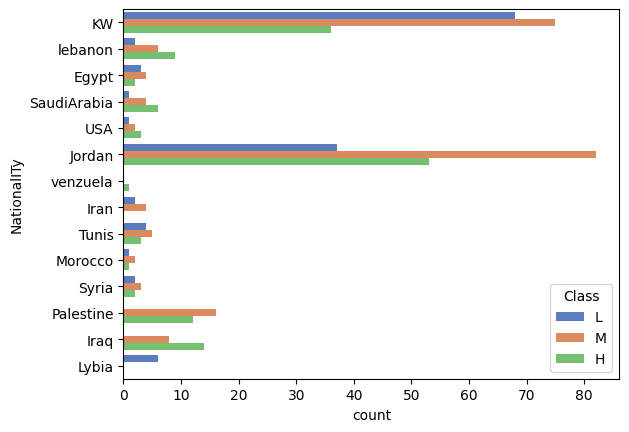

In [30]:
#plt.subplot(1,2,2)
sns.countplot(y="NationalITy", hue="Class", hue_order=['L','M','H'], data=df, palette="muted")
plt.show()

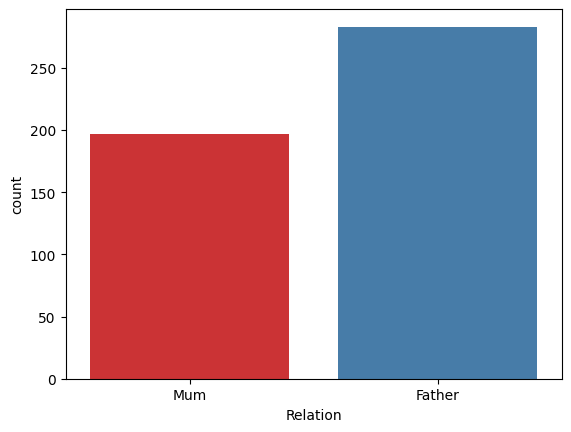

In [31]:
sns.countplot(x="Relation", order=['Mum','Father'], data=df, palette="Set1")
plt.show()

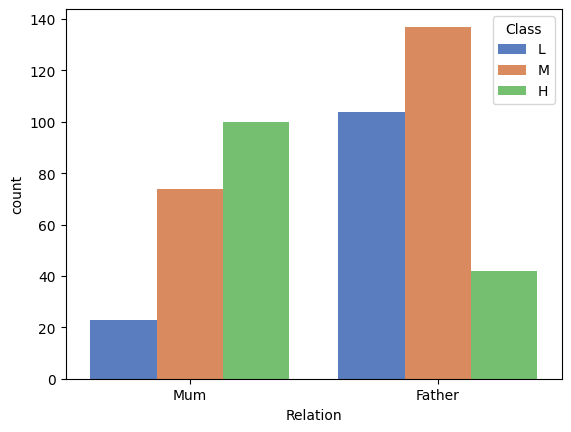

In [32]:
sns.countplot(x="Relation", order=['Mum','Father'], hue="Class", hue_order=['L','M','H'], data=df, palette="muted")
plt.show()

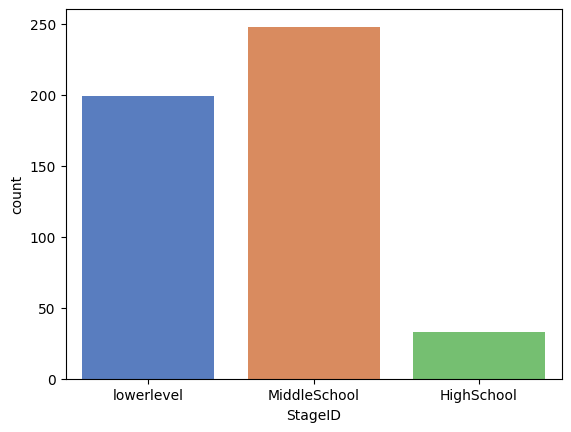

In [33]:
sns.countplot(x="StageID", data=df, palette="muted")
plt.show()

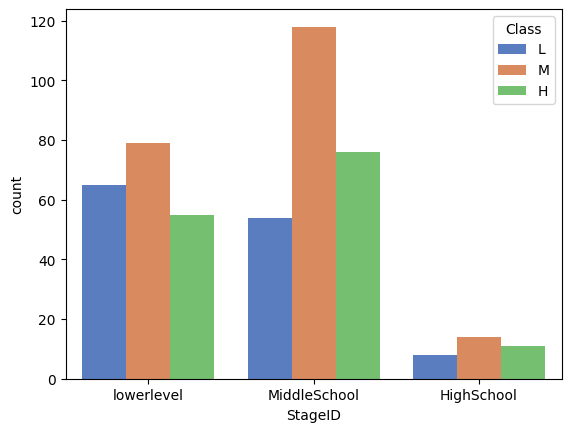

In [34]:
sns.countplot(x="StageID", hue="Class", hue_order=['L','M','H'], data=df, palette="muted")
plt.show()

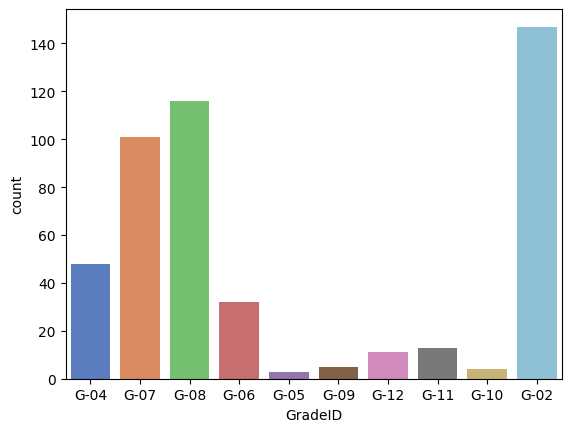

In [35]:
sns.countplot(x="GradeID", data=df, palette="muted")
plt.show()

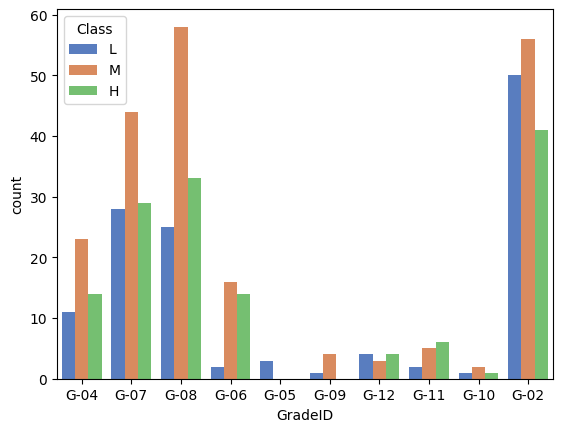

In [36]:
sns.countplot(x="GradeID", hue="Class", hue_order=['L','M','H'], data=df, palette="muted")
plt.show()

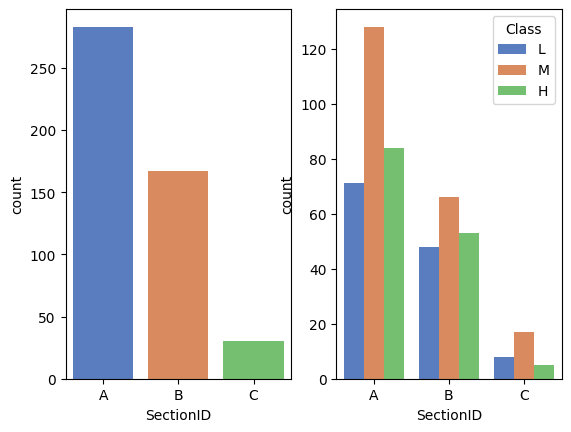

In [37]:
plt.subplot(1,2,1)
sns.countplot(x="SectionID", order=['A','B','C'], data=df, palette="muted")

plt.subplot(1,2,2)
sns.countplot(x="SectionID", order=['A','B','C'], hue="Class", hue_order=['L','M','H'], data=df, palette="muted")

plt.show()

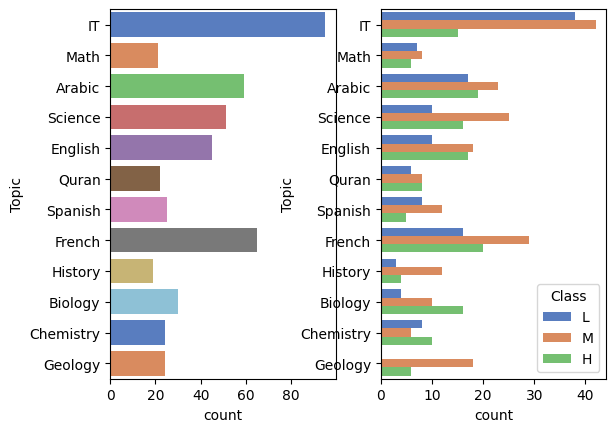

In [38]:
plt.subplot(1,2,1)
sns.countplot(y="Topic", data=df, palette="muted")

plt.subplot(1,2,2)
sns.countplot(y="Topic", hue="Class", hue_order=['L','M','H'], data=df, palette="muted")

plt.show()

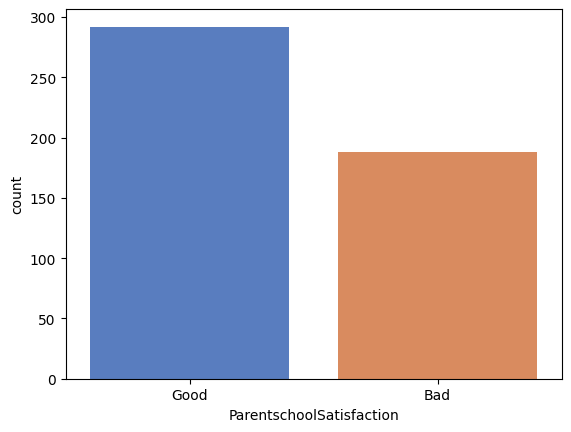

In [39]:
#plt.subplot(1,2,1)
sns.countplot(x="ParentschoolSatisfaction", data=df, palette="muted")
plt.show()

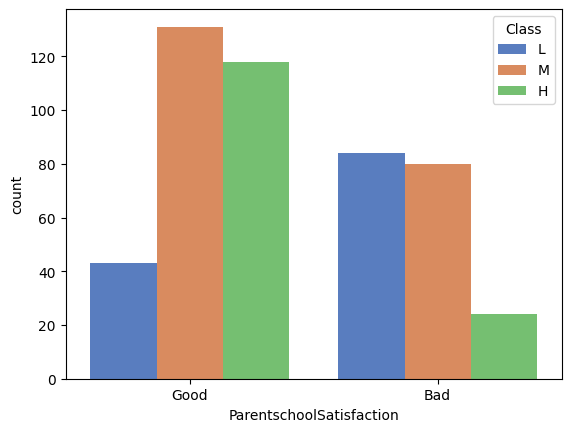

In [40]:
#plt.subplot(1,2,2)
sns.countplot(x="ParentschoolSatisfaction", hue="Class", hue_order=['L','M','H'], data=df, palette="muted")
plt.show()

In [41]:
# Checking dataset 

# Pre-processing

gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object

ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object

In [44]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [45]:
df['LGender'] = le.fit_transform(df['gender'])#.values.reshape(-1,1).ravel())
df['LNationalITy'] = le.fit_transform(df['NationalITy'])
df['LPlaceofBirth'] = le.fit_transform(df['PlaceofBirth'])
df['LStageID'] = le.fit_transform(df['StageID'])
df['LGradeID'] = le.fit_transform(df['GradeID'])
df['LSectionID'] = le.fit_transform(df['SectionID'])
df['LTopic'] = le.fit_transform(df['Topic'])
df['LSemester'] = le.fit_transform(df['Semester'])
df['LRelation'] = le.fit_transform(df['Relation'])
df['LParentschoolSatisfaction'] = le.fit_transform(df['ParentschoolSatisfaction'])
df['LParentAnsweringSurvey'] = le.fit_transform(df['ParentAnsweringSurvey'])
df['LStudentAbsenceDays'] = le.fit_transform(df['StudentAbsenceDays'])
df['LClass'] = le.fit_transform(df['Class'])
df.head(1)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,...,LStageID,LGradeID,LSectionID,LTopic,LSemester,LRelation,LParentschoolSatisfaction,LParentAnsweringSurvey,LStudentAbsenceDays,LClass
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,...,2,1,0,7,0,0,1,1,1,2


In [46]:
df=df.drop(["gender"],axis=1)
df=df.drop(["NationalITy"],axis=1)
df=df.drop(["PlaceofBirth"],axis=1)
df=df.drop(["StageID"],axis=1)
df=df.drop(["GradeID"],axis=1)
df=df.drop(["SectionID"],axis=1)
df=df.drop(["Topic"],axis=1)
df=df.drop(["Semester"],axis=1)
df=df.drop(["Relation"],axis=1)
df=df.drop(["ParentAnsweringSurvey"],axis=1)
df=df.drop(["StudentAbsenceDays"],axis=1)
df=df.drop(["ParentschoolSatisfaction"],axis=1)
df=df.drop(["Class"],axis=1)
df.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,LGender,LNationalITy,LPlaceofBirth,LStageID,LGradeID,LSectionID,LTopic,LSemester,LRelation,LParentschoolSatisfaction,LParentAnsweringSurvey,LStudentAbsenceDays,LClass
0,15,16,2,20,1,4,4,2,1,0,7,0,0,1,1,1,2
1,20,20,3,25,1,4,4,2,1,0,7,0,0,1,1,1,2
2,10,7,0,30,1,4,4,2,1,0,7,0,0,0,0,0,1
3,30,25,5,35,1,4,4,2,1,0,7,0,0,0,0,0,1
4,40,50,12,50,1,4,4,2,1,0,7,0,0,0,0,0,2


# Univariate Selection

In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [48]:
x=df.iloc[:,df.columns !='LClass']
y=df.iloc[:,df.columns =='LClass']

In [49]:
x.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,LGender,LNationalITy,LPlaceofBirth,LStageID,LGradeID,LSectionID,LTopic,LSemester,LRelation,LParentschoolSatisfaction,LParentAnsweringSurvey,LStudentAbsenceDays
0,15,16,2,20,1,4,4,2,1,0,7,0,0,1,1,1
1,20,20,3,25,1,4,4,2,1,0,7,0,0,1,1,1
2,10,7,0,30,1,4,4,2,1,0,7,0,0,0,0,0
3,30,25,5,35,1,4,4,2,1,0,7,0,0,0,0,0
4,40,50,12,50,1,4,4,2,1,0,7,0,0,0,0,0


In [50]:
y.head()

,LClass
0,2
1,2
2,1
3,1
4,2


In [51]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [52]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
featureScores.nlargest(10,'Score')  

,Specs,Score
1,VisITedResources,4700.833099
0,raisedhands,4124.551198
2,AnnouncementsView,2618.905697
3,Discussion,809.349399
15,LStudentAbsenceDays,89.612751
12,LRelation,47.971767
14,LParentAnsweringSurvey,41.722034
13,LParentschoolSatisfaction,26.817227
10,LTopic,13.903882
4,LGender,12.150190


<AxesSubplot:>

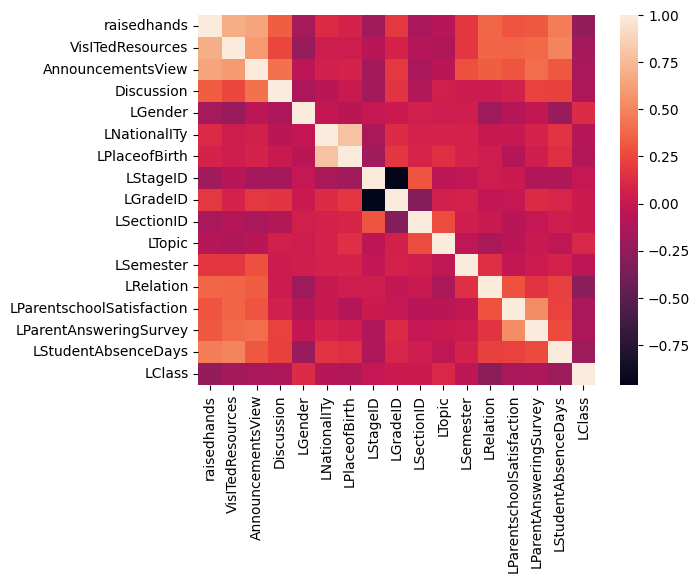

In [53]:
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# Classification

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2)

In [56]:
x_train.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,LGender,LNationalITy,LPlaceofBirth,LStageID,LGradeID,LSectionID,LTopic,LSemester,LRelation,LParentschoolSatisfaction,LParentAnsweringSurvey,LStudentAbsenceDays
479,35,14,23,62,0,3,3,1,5,0,6,1,0,0,0,0
81,8,25,1,70,1,4,4,2,0,0,7,0,0,0,0,0
243,12,20,38,46,1,0,4,1,4,1,10,1,0,0,0,0
24,0,2,3,70,1,4,4,1,4,1,7,0,0,1,1,0
468,15,9,14,80,0,3,3,1,5,0,2,0,0,0,0,0


In [57]:
y_train.head()

,LClass
479,1
81,1
243,2
24,1
468,1


# Models

## LogisticRegression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
lr=LogisticRegression()

In [60]:
lr.fit(x_train,y_train)

LogisticRegression()

In [61]:
predict1=lr.predict(x_test)

In [62]:
model1=accuracy_score(y_test,predict1)
print(model1)

0.6875


## SVM

In [63]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')

In [64]:
svclassifier.fit(x_train,y_train)

SVC(kernel='linear')

In [65]:
predict2=svclassifier.predict(x_test)

In [66]:
model2=accuracy_score(y_test,predict2)
print(model1)

0.6875


# Neural_Network

In [67]:
from sklearn.neural_network import MLPClassifier

In [68]:
nn = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

In [69]:
nn.fit(x_train,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [70]:
predict3=svclassifier.predict(x_test)

In [71]:
model3=accuracy_score(y_test,predict3)
print(model3)

0.6666666666666666


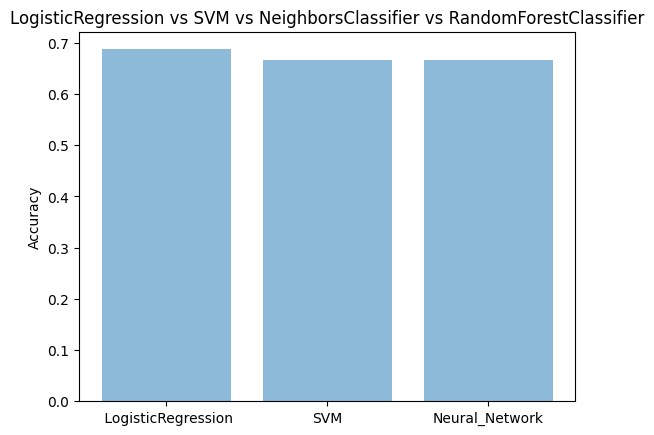

In [72]:
import matplotlib.pyplot as plt; plt.rcdefaults()

objects = (' LogisticRegression','SVM','Neural_Network')
y_pos = np.arange(len(objects))
performance = [model1,model2,model3]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('LogisticRegression vs SVM vs NeighborsClassifier vs RandomForestClassifier')

plt.show()